# Dataset for prediction the final grade of Portugese high school students

## EDA

Let's read dataset with function **_pd.read_csv_** and see the structure of dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('C:\\bioinformatics_institute\\python\\homework\\pandas\\student-mat.csv', sep=',')


Find number of rows

In [7]:
data.shape[0]

395

number of columns

In [8]:
data.shape[1]

33

Function **df.size** count number of values in dataframe

In [9]:
data.size

13035

Use function **head** to see first five strings of dataframe

In [10]:
# pd.set_option('display.max_columns', None)  # need to get all columns when use df.head
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Get column names with function **df.columns**

In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Count number of missing values in dataframe

In [13]:
data.isna().sum().sum() 

0

In [14]:
data.school.unique()

array(['GP', 'MS'], dtype=object)

Let's visualize number of students in each school  
  
  
**_Fig.1_**

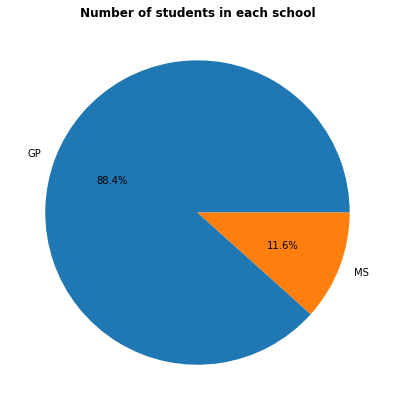

In [15]:
sch = data.school.value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(x=sch.values(), labels=sch.keys(), autopct='%1.1f%%')
plt.title('Number of students in each school', fontweight='bold')
plt.show()

Sex and age distribution  
  
  
**_Fig.2_**  

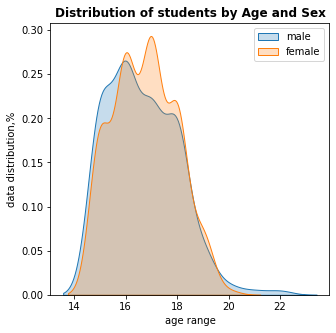

In [20]:
plt.figure(figsize = (5,5))
sns.kdeplot(data.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(data.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.title('Distribution of students by Age and Sex', fontweight='bold')
plt.xlabel('age range')
plt.ylabel('data distribution,%')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


Let's see G3 distribution which is correspond to the 1st period grades.  
  
  
**_Fig.3_**

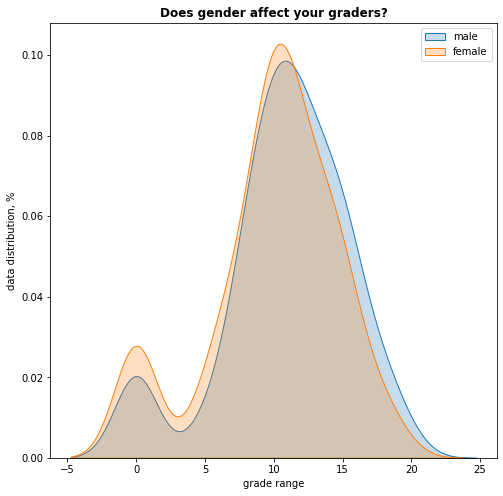

In [176]:
plt.figure(figsize = (5,5))
sns.kdeplot(data.groupby('sex').get_group('M')['G3'], shade = True,label = 'male')
sns.kdeplot(data.groupby('sex').get_group('F')['G3'], shade = True, label = 'female')
plt.xlabel('grade range')
plt.ylabel('data distribution, %')
plt.title('Does gender affect your graders?', fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

We see that gender doesn't influence to final grade. Final Grade distribution looks same in both groups.

Let's see correlation between G3 grades and guardians.  
  
**_Fig.4_**

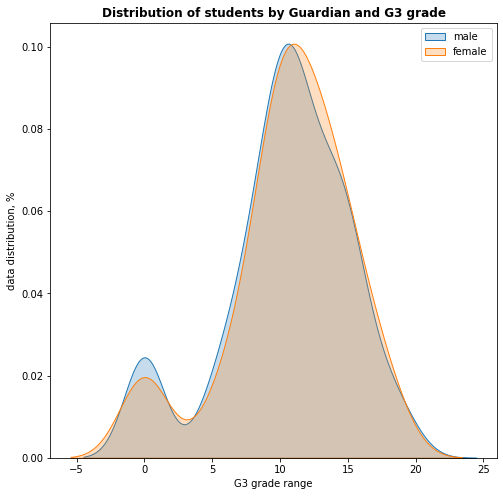

In [199]:
plt.figure(figsize = (5,5))
sns.kdeplot(data.groupby('guardian').get_group('mother')['G3'], shade = True,label = 'male')
sns.kdeplot(data.groupby('guardian').get_group('father')['G3'], shade = True, label = 'female')
plt.title('Distribution of students by Guardian and G3 grade', fontweight='bold')
plt.xlabel('G3 grade range')
plt.ylabel('data distribution, %')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

We don't see significant influence of variable "Guardian" on G3 grade.

In [ ]:
Build correlation matrix.

**_Fig.5_** **Correlation Matrix**

<AxesSubplot:>

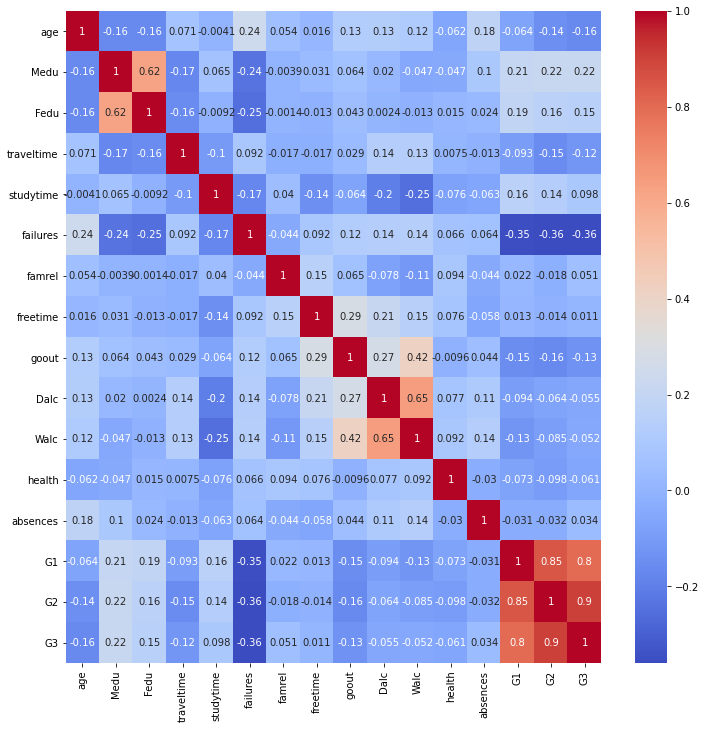

In [175]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

We see that G3 has strong positive correlation wit "G2" and "G1" and negative corrrelation with "failures" and "age".  
  
**_Fig.6_**

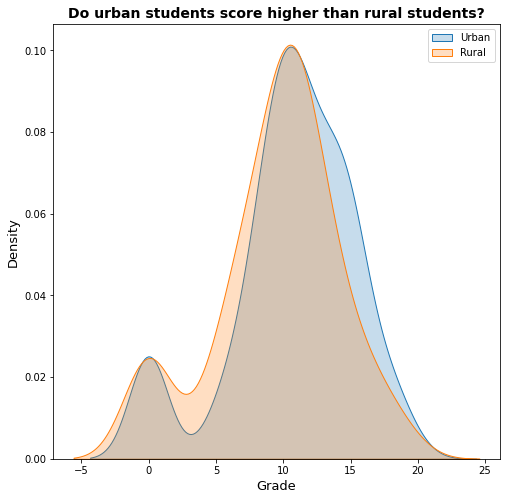

In [192]:
plt.figure(figsize = (5,5))
sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 14, fontweight='bold')
plt.xlabel('Grade', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

We can see that both urban and rural students have same distrubution of scores.  
  
**_Fig.7_**

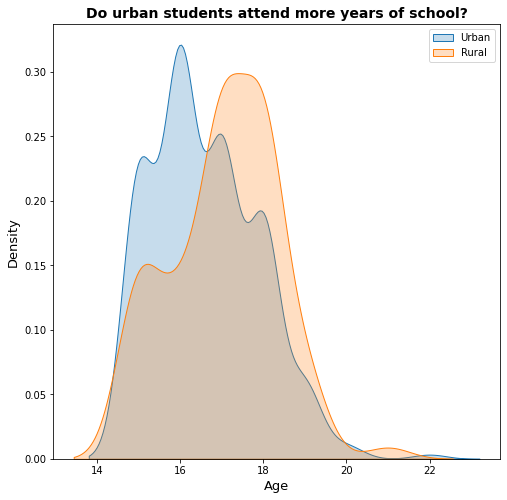

In [194]:
plt.figure(figsize = (5,5))
sns.kdeplot(data.loc[data['address'] == 'U', 'age'], label='Urban', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'age'], label='Rural', shade = True)
plt.title('Do urban students attend more years of school?', fontsize = 14, fontweight='bold')
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Density', fontsize = 13)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

We see that there is difference between these groups.

In [1]:
# this part of code was saved as alternative to previous graph

# g = sns.FacetGrid(data, col="sex", hue="sex")
# g.map(sns.histplot, "G3")
# # plt.xlabel('Final Grade')
# # plt.ylabel('Count')
# g.axes[0,0].set_xlabel('Final Grade')
# g.axes[0,1].set_xlabel('Final Grade')
# g.axes[0,0].set_ylabel('Count')
# g.axes[0,0].set_title("Female")
# g.axes[0,1].set_title("Male")
# g.fig.subplots_adjust(top=0.7)
# g.fig.suptitle('Final grade distribution')

We conducted short EDA and can say that variables "sex", "address" and "guardian" don't influence on G3 grades.